# CCS Prediction
This notebook focuses on analyzing the CCS prediction using different methods, performance comparison will be shown

## Preliminars

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import utils
import scipy

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df1 = pd.read_csv('../dl_paper/SourceData_Figure_1.csv')
df4 = pd.read_csv('../dl_paper/SourceData_Figure_4.csv')

# Exploration

Text(0.5, 1.0, 'CCS vs Mass')

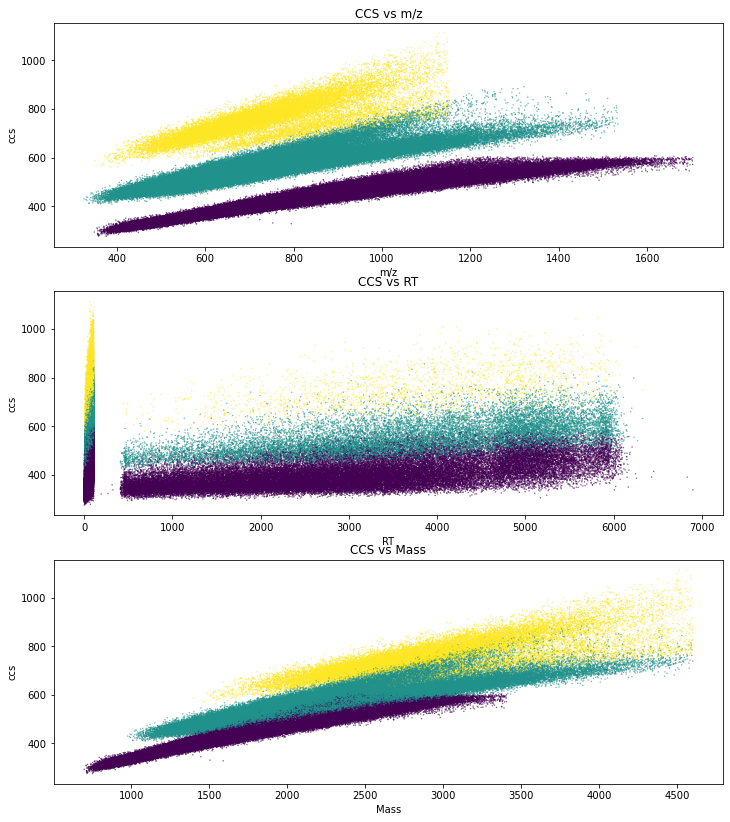

In [6]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (12,14))
ax[0].scatter(df1['m/z'], df1['CCS'], c = df1['Charge'], s = 0.1)
ax[0].set_xlabel('m/z')
ax[0].set_ylabel('ccs')
ax[0].set_title('CCS vs m/z')

ax[1].scatter(df1['Retention time'], df1['CCS'], c = df1['Charge'], s = 0.1)
ax[1].set_xlabel('RT')
ax[1].set_ylabel('ccs')
ax[1].set_title('CCS vs RT')

ax[2].scatter(df1['Mass'], df1['CCS'], c = df1['Charge'], s = 0.1)
ax[2].set_xlabel('Mass')
ax[2].set_ylabel('ccs')
ax[2].set_title('CCS vs Mass')

# Linear Regression

In [4]:
import regression_linear

In [5]:
lr = regression_linear.LinearRegression()
lr.fit(df1)

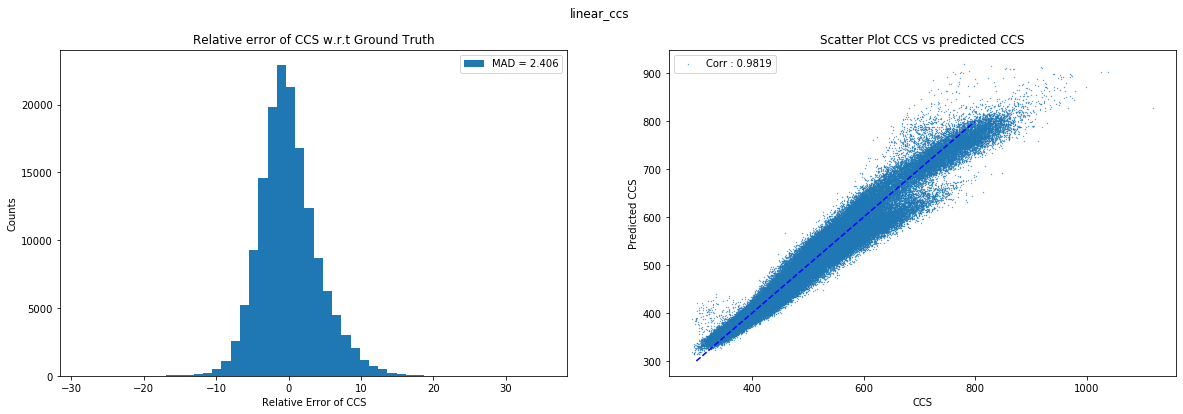

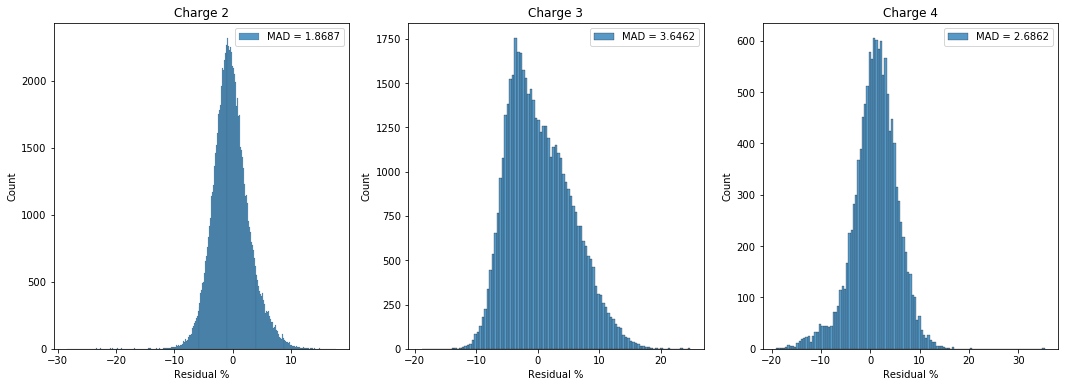

In [6]:
df4['m/z'] = df4.apply(lambda x: utils.calculate_mass(x['Modified_sequence'], x['Charge']), axis = 1)
lr.test_set_plot(df4)

# Power-law Regression

In [7]:
import regression_power

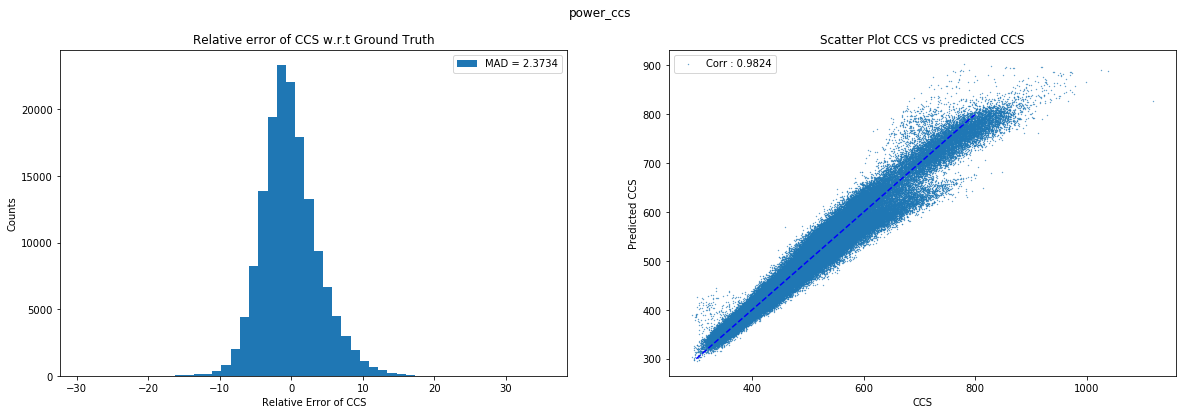

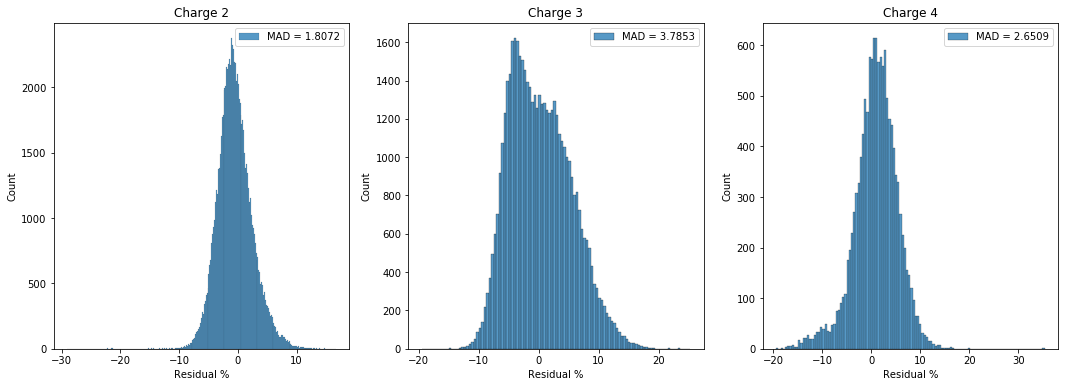

In [8]:
pl = regression_power.PowerLawRegression()
pl.fit(df1)
pl.test_set_plot(df4)


# XGBoost

In [9]:
import regression_xgboost

In [10]:
path_models = "/mnt/pool-cox-data08/Juan/ccs/models/"

## XGBoost Counts

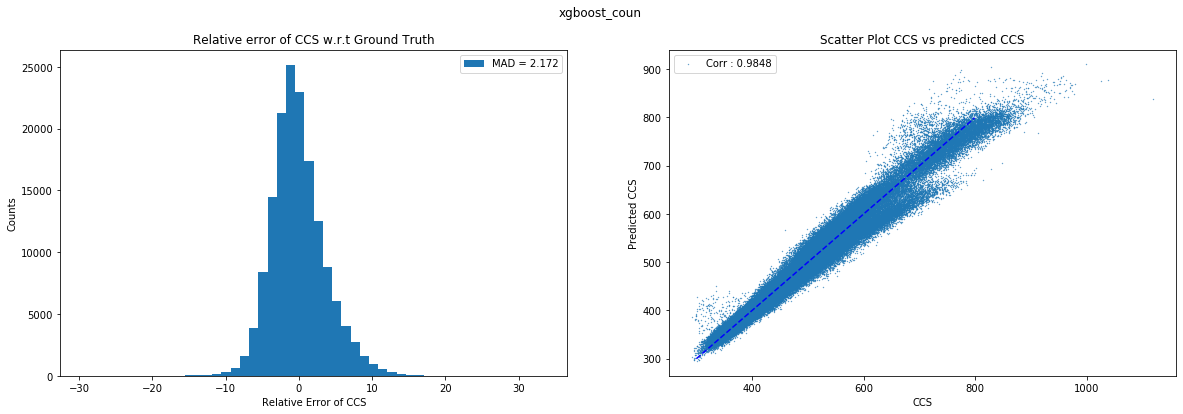

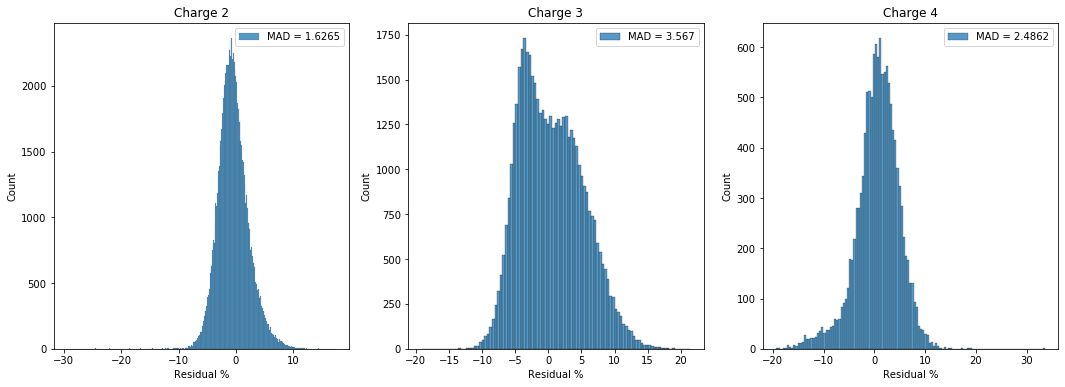

In [11]:
regression_xgboost.test_set_results('Counts')

## XGBoost Di-peptides

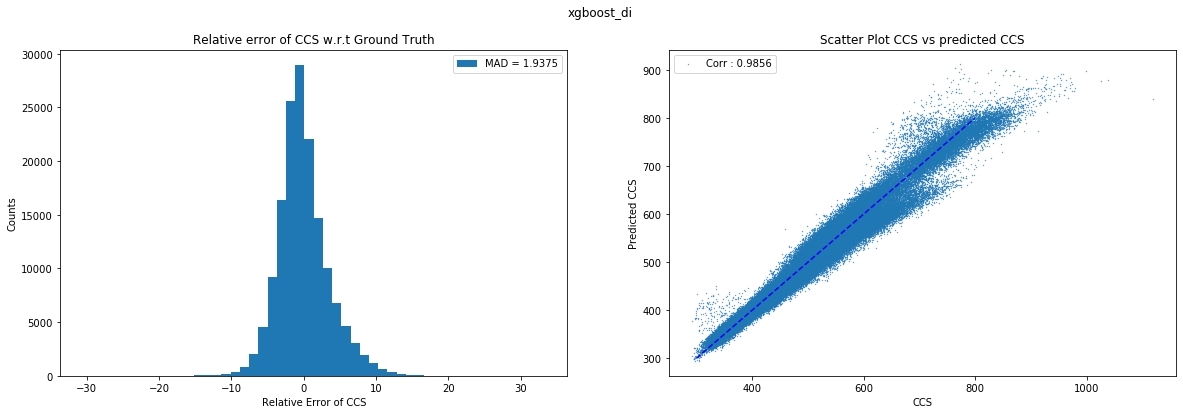

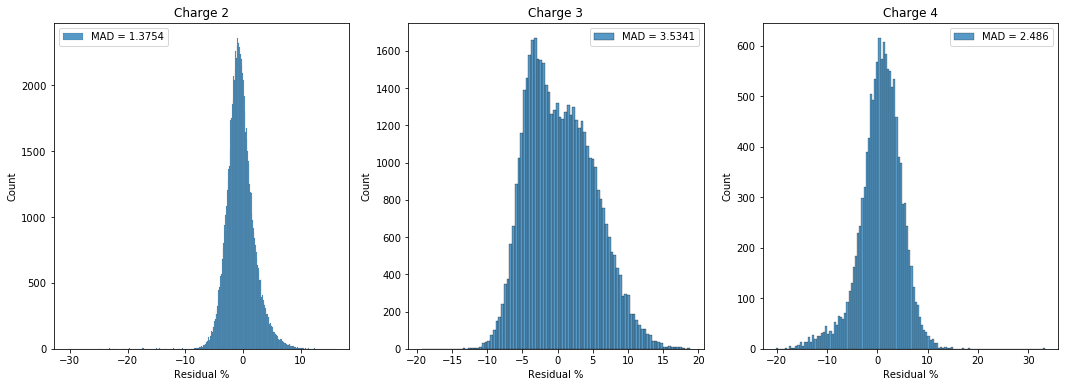

In [12]:
regression_xgboost.test_set_results('Di-peptides')

## XGBoost Counts + Di-peptides

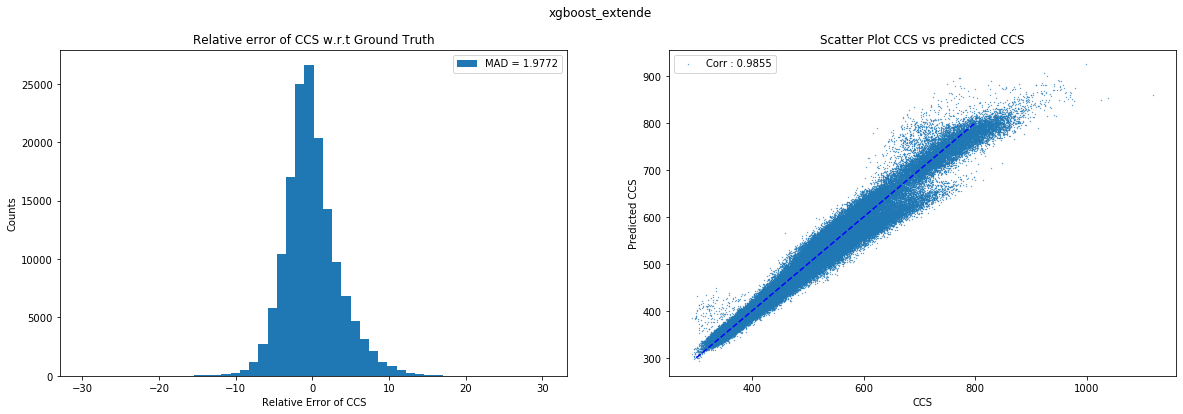

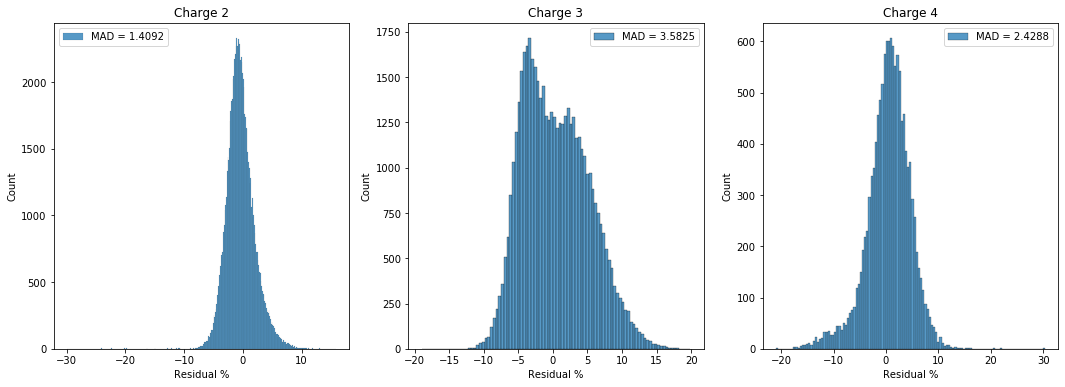

In [13]:
regression_xgboost.test_set_results('Extended')

## XGBoost di-peptides + helix

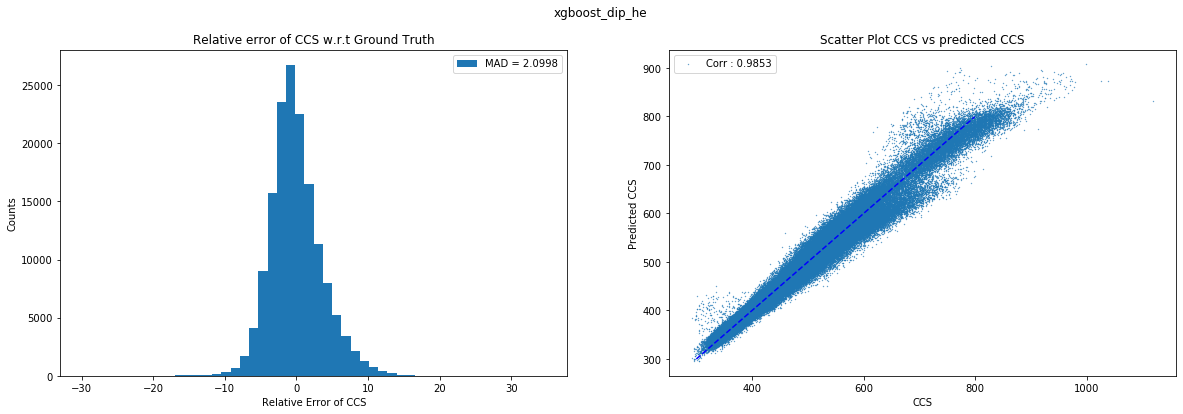

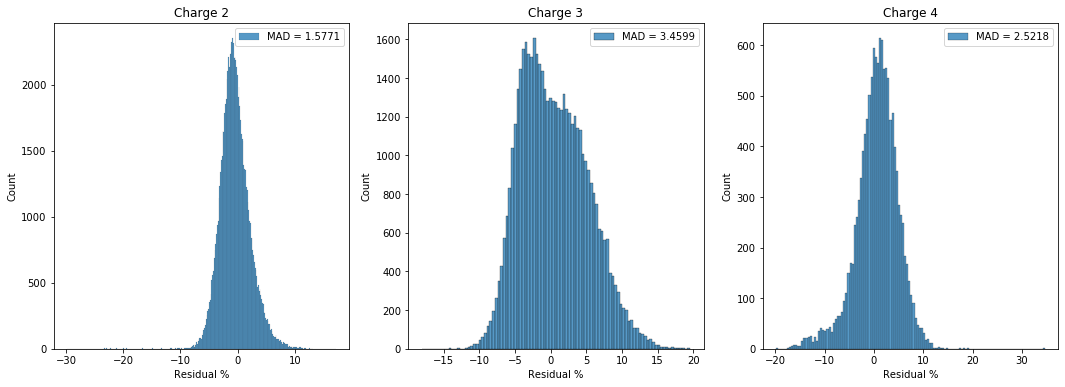

In [14]:
regression_xgboost.test_set_results('Dip-hel')

# LinearSVR

In [15]:
import svr

Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


## SVR Counts

Predicting


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.8s remaining:    3.2s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


Creating histogram
Creating scatter plot


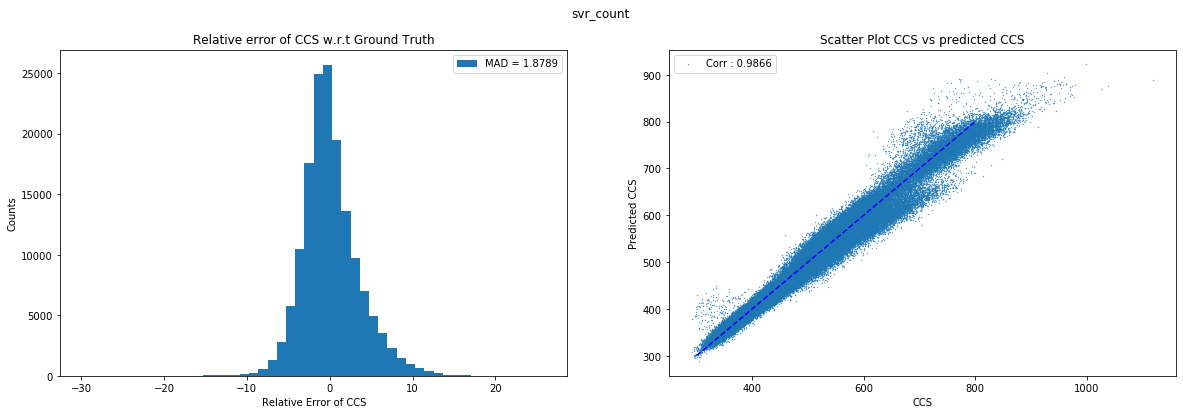

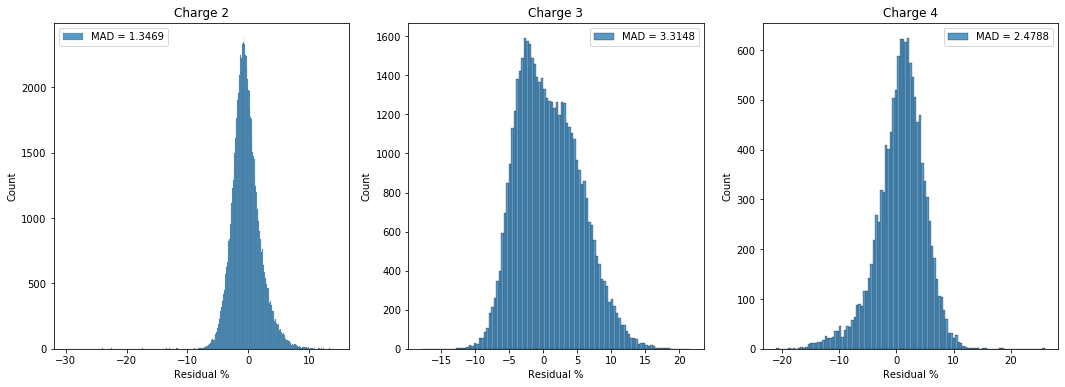

In [16]:
svr_counts = svr.test_set_results('Counts')

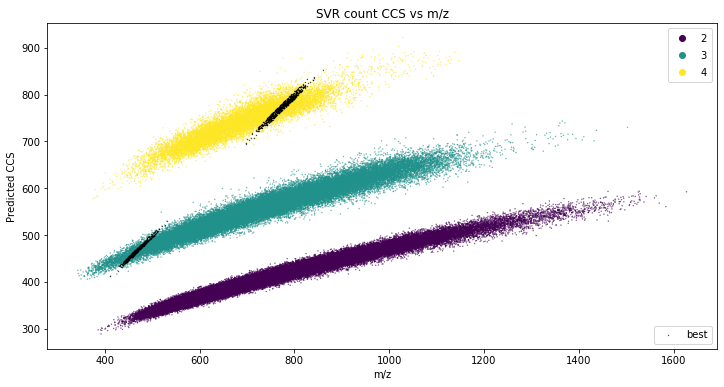

In [91]:
ax = plt.subplot()
fig = plt.gcf()
fig.set_size_inches(12, 6)
scatter1 = ax.scatter(df4['m/z'], svr_counts, c = df4['Charge'], s = 0.1)
res_rel = (df4['m/z'].values - svr_counts.values)/svr_counts.values*100
df_top = df4[np.abs(res_rel) < 1.]
ax.scatter(df_top['m/z'], svr_counts[np.abs(res_rel) < 1.], c = 'black', s = 0.1, label = 'best')
ax.set_xlabel('m/z')
ax.set_ylabel('Predicted CCS')
ax.set_title('SVR count CCS vs m/z')
legend1 = ax.legend(*scatter1.legend_elements())
ax.add_artist(legend1)
ax.legend(loc = 'lower right')

## SVR Di-peptides

Predicting


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    2.9s remaining:   11.8s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    3.6s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    1.0s remaining:    4.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.3s remaining:    1.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.3s finished


Creating histogram
Creating scatter plot


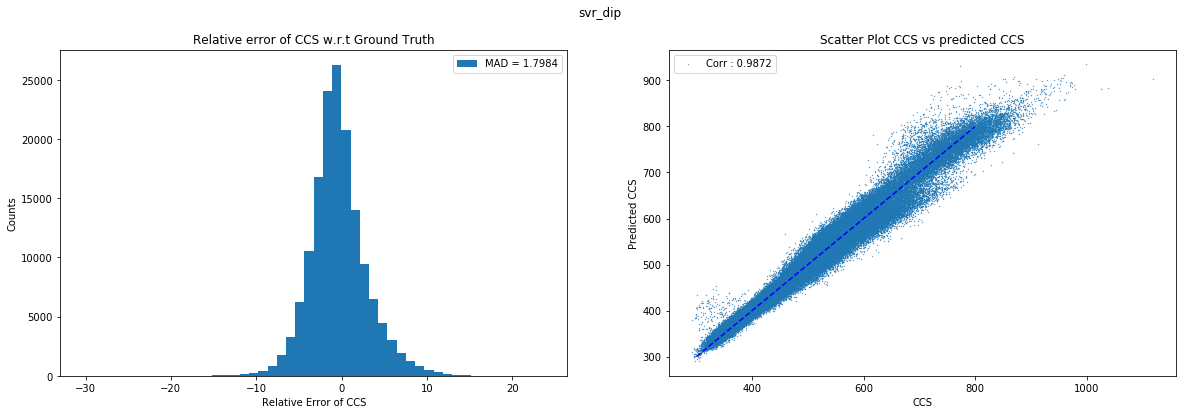

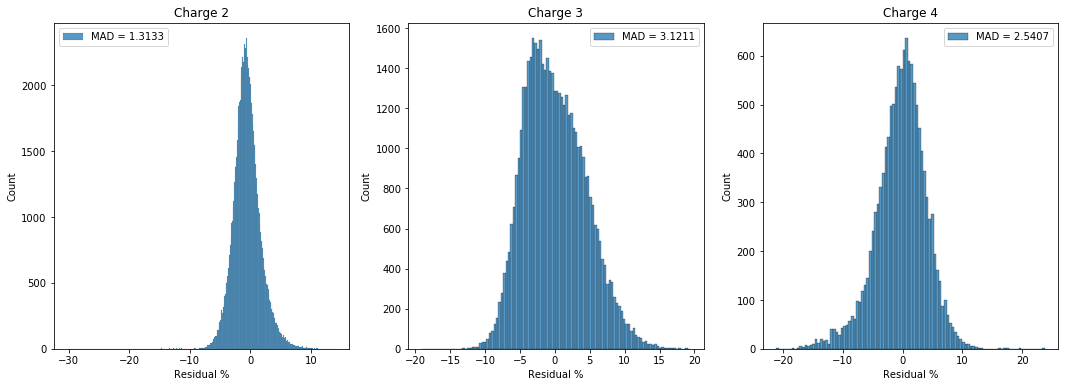

In [18]:
svr_dip = svr.test_set_results('Di-peptides')

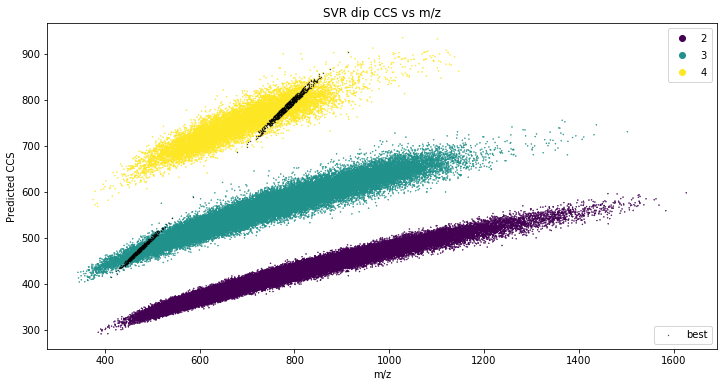

In [96]:
ax = plt.subplot()
fig = plt.gcf()
fig.set_size_inches(12, 6)
ax.scatter(df4['m/z'], svr_dip, c = df4['Charge'], s = 0.1)
scatter1 = ax.scatter(df4['m/z'], svr_dip, c = df4['Charge'], s = 0.1)
res_rel = (df4['m/z'].values - svr_dip.values)/svr_dip.values*100
df_top = df4[np.abs(res_rel) < 1.]
ax.scatter(df_top['m/z'], svr_dip[np.abs(res_rel) < 1.], c = 'black', s = 0.1, label = 'best')
ax.set_xlabel('m/z')
ax.set_ylabel('Predicted CCS')
ax.set_title('SVR dip CCS vs m/z')
legend1 = ax.legend(*scatter1.legend_elements())
ax.add_artist(legend1)
ax.legend(loc = 'lower right')

## SVR Counts + Di-peptides

Predicting


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    4.3s remaining:   17.3s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    5.6s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    1.2s remaining:    4.8s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    1.4s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.3s remaining:    1.3s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.4s finished


Creating histogram
Creating scatter plot


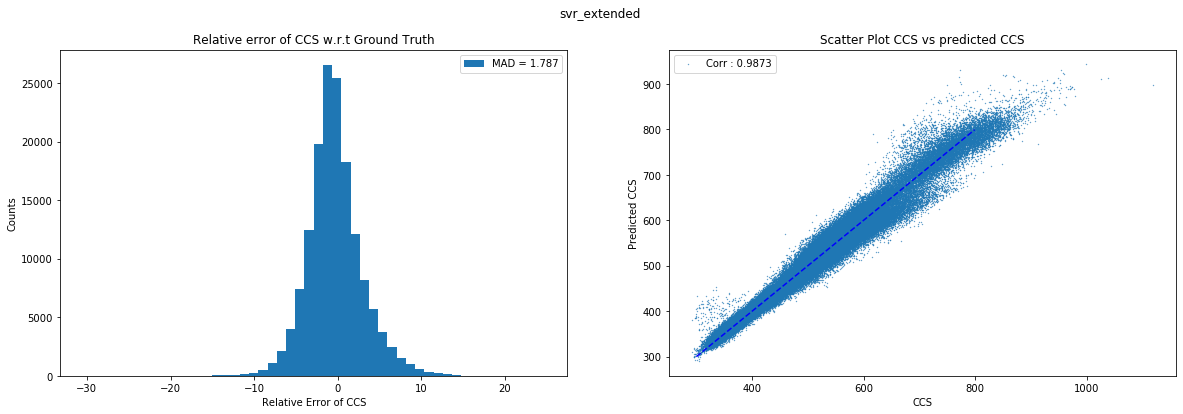

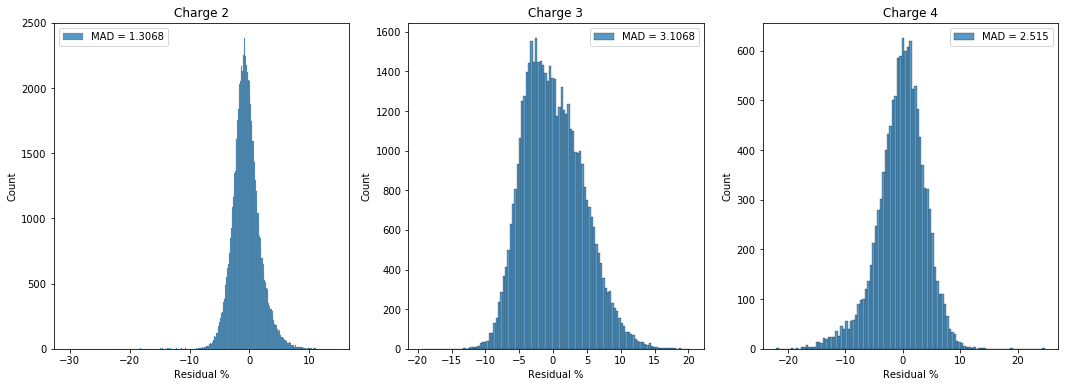

In [71]:
svr_ext = svr.test_set_results('Extended')

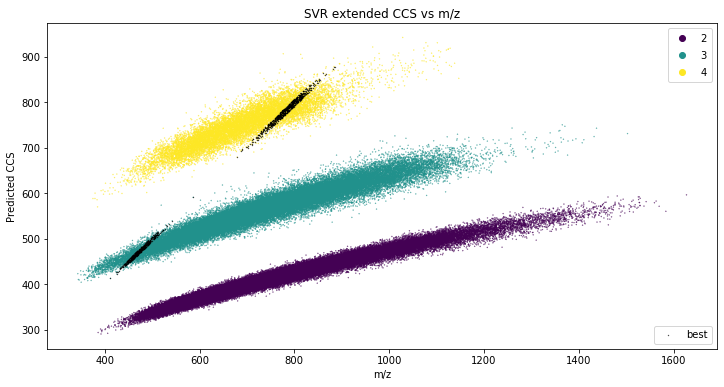

In [93]:
ax = plt.subplot()
fig = plt.gcf()
fig.set_size_inches(12, 6)
scatter1 = ax.scatter(df4['m/z'], svr_ext, c = df4['Charge'], s = 0.1)
res_rel = (df4['m/z'].values - svr_ext.values)/svr_ext.values*100
df_top = df4[np.abs(res_rel) < 1.]
ax.scatter(df_top['m/z'], svr_ext[np.abs(res_rel) < 1.], c = 'black', s = 0.1, label = "best")
ax.set_xlabel('m/z')
ax.set_ylabel('Predicted CCS')
ax.set_title('SVR extended CCS vs m/z')
legend1 = ax.legend(*scatter1.legend_elements())
ax.add_artist(legend1)
ax.legend(loc = 'lower right')

## SVR Dipeptides and Helix

Predicting


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    6.2s remaining:   24.6s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    8.4s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    2.3s remaining:    9.2s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    2.7s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.5s remaining:    2.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.6s finished


Creating histogram
Creating scatter plot


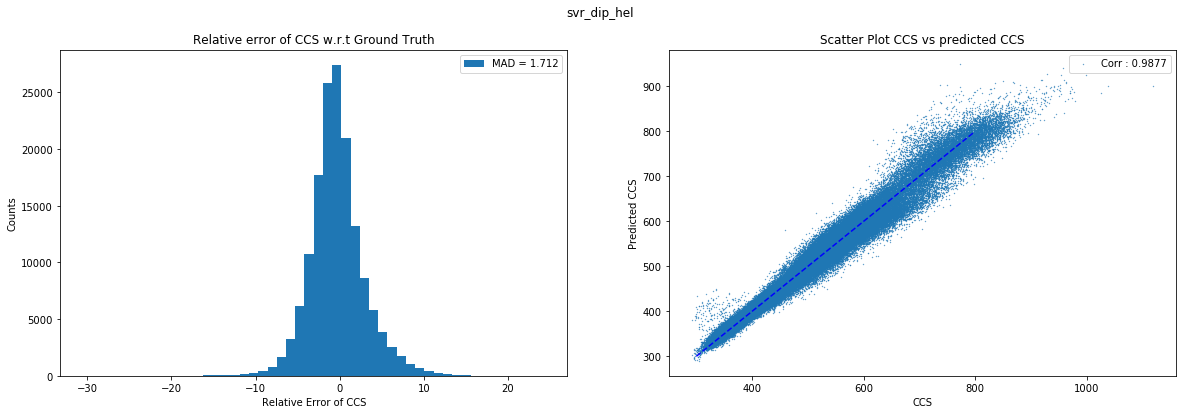

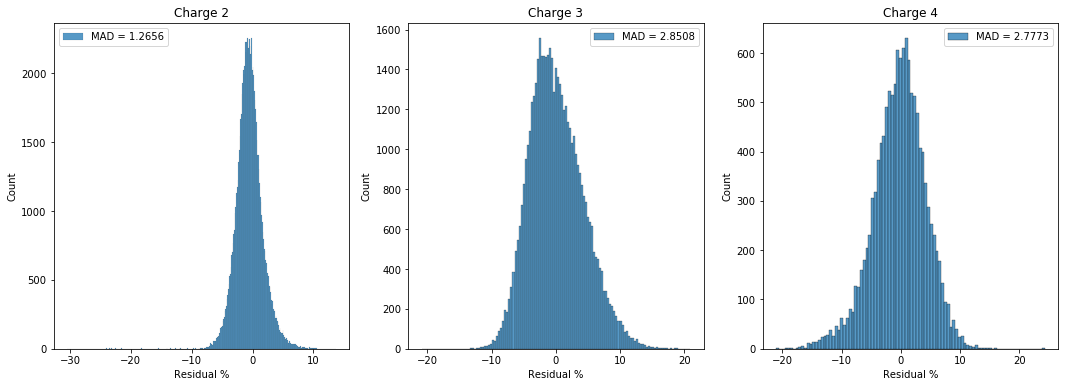

In [22]:
svr_dip_hel = svr.test_set_results('Dip-hel')

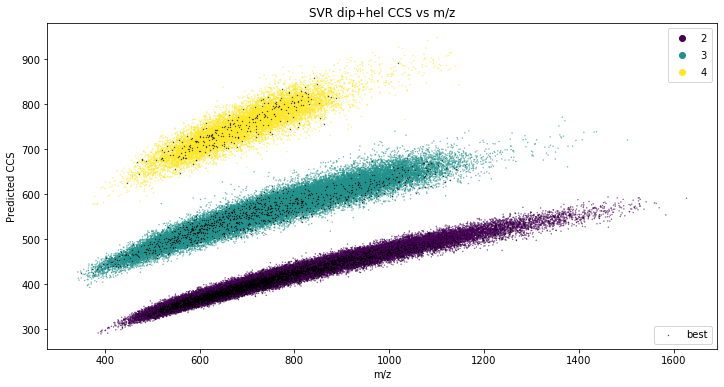

In [85]:
ax = plt.subplot()
fig = plt.gcf()
fig.set_size_inches(12, 6)
scatter1 = ax.scatter(df4['m/z'], svr_dip_hel, c = df4['Charge'], s = 0.1)
res_rel = (df4['CCS'].values-svr_dip_hel.values)/svr_dip_hel.values*100
df_top = df4[np.abs(res_rel) < 0.1]
ax.scatter(x=df_top['m/z'], y=svr_dip_hel[np.abs(res_rel) < 0.1], c = 'black', s = 0.1, label = 'best')
ax.set_xlabel('m/z')
ax.set_ylabel('Predicted CCS')
ax.set_title('SVR dip+hel CCS vs m/z')
legend1 = ax.legend(*scatter1.legend_elements())
ax.add_artist(legend1)
ax.legend(loc = "lower right")

# RNN

Creating scatter plot


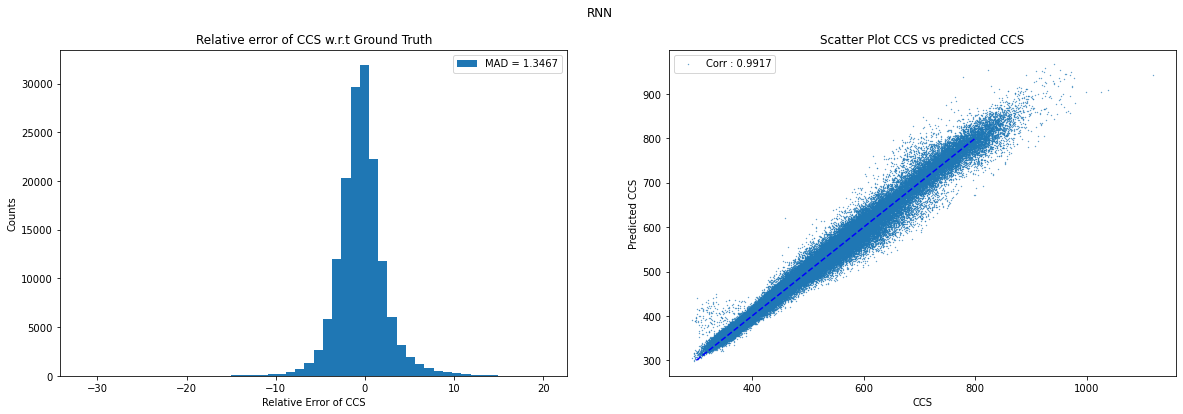

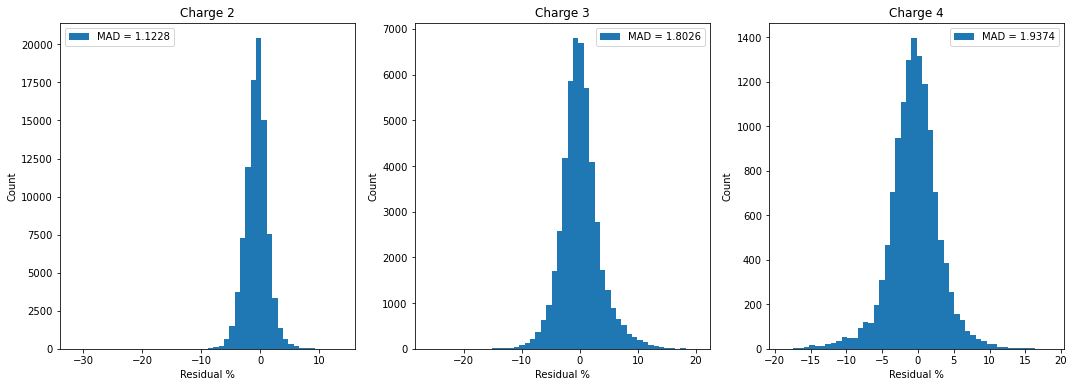

In [5]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
fig.suptitle('RNN', fontsize = 12)
res_rel = (df4['CCS']-df4['label Prediction 0'])/df4['label Prediction 0']*100
ax[0].hist(res_rel, bins = 50, label = f'MAD = {np.round(scipy.stats.median_abs_deviation(res_rel), 4)}')
ax[0].set_xlabel('Relative Error of CCS')
ax[0].set_ylabel('Counts')
ax[0].set_title('Relative error of CCS w.r.t Ground Truth')
ax[0].legend()

print('Creating scatter plot')
corr, _ = scipy.stats.pearsonr(df4['label Prediction 0'],df4['CCS'])
ax[1].scatter(df4['CCS'], df4['label Prediction 0'], label = f'Corr : {np.round(corr, 4)}', s = 0.1)
ax[1].set_xlabel('CCS')
ax[1].set_ylabel('Predicted CCS')
ax[1].set_title('Scatter Plot CCS vs predicted CCS')
ax[1].plot(np.arange(300,800), np.arange(300,800), 'b--')
ax[1].legend()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
i = 0
for ax, df_it in zip(ax, [df4[df4['Charge']==2], df4[df4['Charge']==3], df4[df4['Charge']==4]]):
    res_rel = (df_it['CCS']-df_it['label Prediction 0'])/df_it['label Prediction 0']*100
    ax.hist(res_rel, label = f"MAD = {np.round(scipy.stats.median_abs_deviation(res_rel), 4)}", bins = 50)
    ax.set_xlabel('Residual %')
    ax.set_ylabel('Count')
    ax.set_title(f'Charge {i+2}')
    ax.legend()
    i += 1

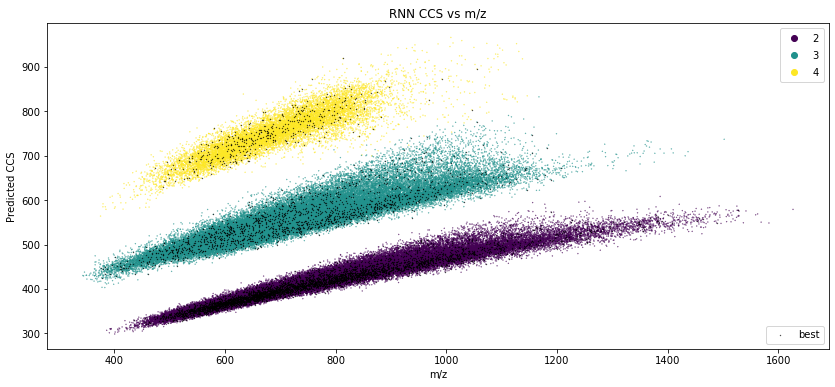

In [56]:
ax = plt.subplot(111)
fig = plt.gcf()
fig.set_size_inches(14,6)
scatter1 = ax.scatter(x=df4['m/z'], y=df4['label Prediction 0'], c = df4['Charge'], s = 0.1)
df_top = df4[np.abs(res_rel) < 0.1]
scatter2 = ax.scatter(x=df_top['m/z'], y=df_top['label Prediction 0'], c = 'black', s = 0.1, label = 'best')
ax.set_xlabel('m/z')
ax.set_ylabel('Predicted CCS')
ax.set_title('RNN CCS vs m/z')
legend1 = ax.legend(*scatter1.legend_elements())
ax.add_artist(legend1)
ax.legend(loc = 'lower right')

**Important:** none of the models predicts the second population